###  Import Required Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering 
import scipy.cluster.hierarchy as sch

###  Load and Explore the Dataset

In [2]:
# Sample dataset representing customers' annual income and spending score 
data = pd.DataFrame({ 
    'Customer ID': range(1, 21), 
    'Annual Income (k$)': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 55, 60, 65, 70, 75, 
80, 85, 90, 95, 100], 
    'Spending Score (1-100)': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 20, 80, 13, 85, 5, 90, 
8, 95, 12, 100] 
}) 
 
# Extracting relevant features 
X = data.iloc[:, 1:].values

# Display first 5 rows 
print(data.head())

   Customer ID  Annual Income (k$)  Spending Score (1-100)
0            1                  15                      39
1            2                  16                      81
2            3                  17                       6
3            4                  18                      77
4            5                  19                      40


###  Standardize Data

In [3]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

### Apply K-Means Clustering

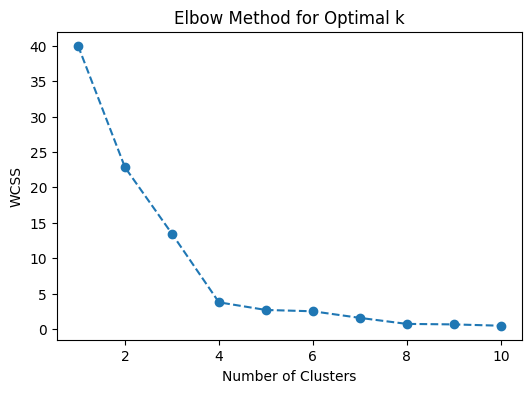

In [4]:
# Determine the optimal number of clusters using Elbow Method 
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, random_state=42) 
    kmeans.fit(X_scaled) 
    wcss.append(kmeans.inertia_) 
 
# Plot the Elbow graph 
plt.figure(figsize=(6, 4)) 
plt.plot(range(1, 11), wcss, marker='o', linestyle='--') 
plt.xlabel('Number of Clusters') 
plt.ylabel('WCSS') 
plt.title('Elbow Method for Optimal k') 
plt.show()

### Choose the optimal number of clusters where the "elbow" occurs. Let's say k=3.

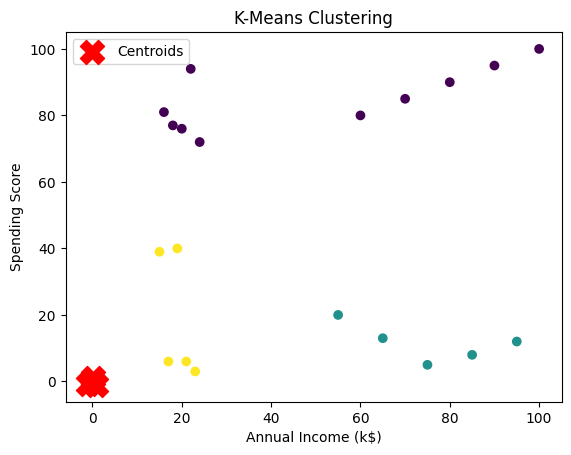

In [5]:
# Apply K-Means with optimal k 
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled) 
 
# Plot Clusters 
plt.scatter(X[:, 0], X[:, 1], c=data['KMeans_Cluster'], cmap='viridis') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],  
            s=300, c='red', marker='X', label='Centroids') 
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score') 
plt.legend() 
plt.title('K-Means Clustering') 
plt.show() 

###  Apply Hierarchical Clustering 

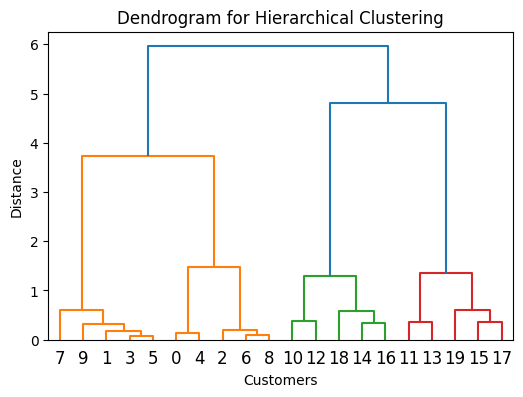

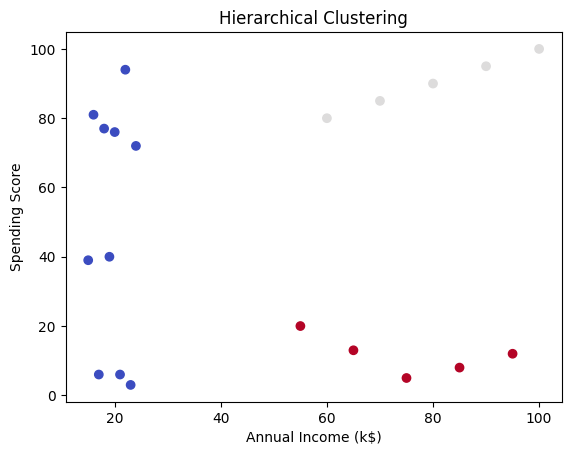

In [6]:
# Create Dendrogram 
plt.figure(figsize=(6, 4)) 
sch.dendrogram(sch.linkage(X_scaled, method='ward')) 
plt.title('Dendrogram for Hierarchical Clustering') 
plt.xlabel('Customers') 
plt.ylabel('Distance') 
plt.show() 
 
# Apply Hierarchical Clustering 
hc = AgglomerativeClustering(n_clusters=3) 
data['Hierarchical_Cluster'] = hc.fit_predict(X_scaled) 
 
# Plot Clusters 
plt.scatter(X[:, 0], X[:, 1], c=data['Hierarchical_Cluster'], cmap='coolwarm') 
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score') 
plt.title('Hierarchical Clustering') 
plt.show()

###  Apply DBSCAN

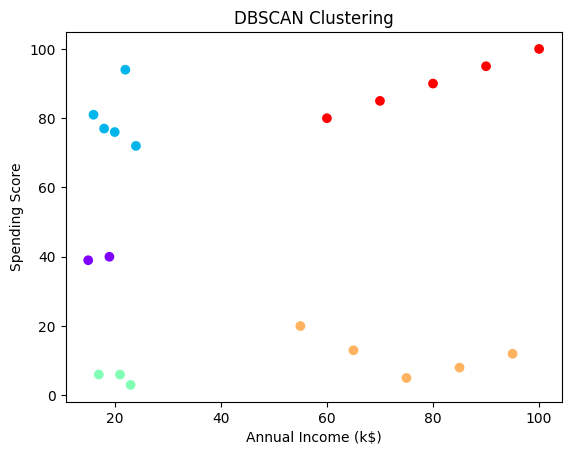

In [7]:
dbscan = DBSCAN(eps=0.5, min_samples=3) 
data['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled) 
 
# Plot Clusters 
plt.scatter(X[:, 0], X[:, 1], c=data['DBSCAN_Cluster'], cmap='rainbow') 
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score') 
plt.title('DBSCAN Clustering') 
plt.show() 